# Распознавание моделей одежды с помощью Keras

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование глубоких нейронных сетей на Python](https://www.asozykin.ru/courses/nnpython)".

<a target="_blank" href="https://colab.research.google.com/github/sozykin/dlpython_course/blob/master/introduction/fashion_mnist_dense.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [4]:
# В Keras встроены средства работы с популярными наборами данных
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 41s 2us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Список с названиями классов

In [5]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

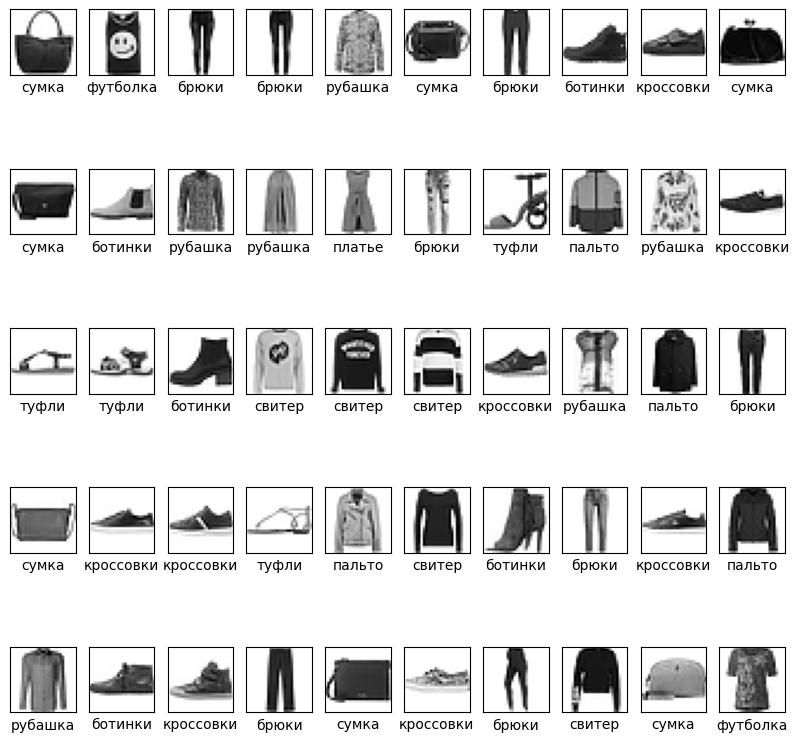

In [6]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [7]:
x_train = x_train.reshape(60000, 784)

**Нормализация данных**

In [8]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255 

**Работа с правильными ответами**

Просматриваем пример правильного ответа

In [9]:
print(y_train[0])

9


**Преобразуем метки в формат one hot encoding**

In [10]:
y_train = utils.to_categorical(y_train, 10)

**Правильный ответ в формате one hot encoding**

In [11]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Создаем нейронную сеть

**Описываем архитектуру нейронной сети**

In [27]:
# Создаем последовательную модель
model = Sequential(
    [   
        # Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
        Dense(800, input_dim=784, activation="relu"),
        # Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
        Dense(10, activation="softmax")
    ]
)

**Компилируем сеть**

Настройка параметров обучения

In [28]:
model.compile(loss="categorical_crossentropy", # Функция потерь
              optimizer="SGD",                 # Оптимизатор
              metrics=["accuracy"])            # Метрика качества 

In [29]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 800)            │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 636,010 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

## Обучаем нейронную сеть

In [30]:
history = model.fit(x_train,         # Данные для обучения
                    y_train,         # Правильные ответы
                    batch_size=200,  # Размер мини-выборки
                    epochs=100,      # Количество эпох обучения
                    verbose=1)       

Epoch 1/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6728 - loss: 1.1041
Epoch 2/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7720 - loss: 0.7221
Epoch 3/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7985 - loss: 0.6327
Epoch 4/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8127 - loss: 0.5847
Epoch 5/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8202 - loss: 0.5533
Epoch 6/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8266 - loss: 0.5305
Epoch 7/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8301 - loss: 0.5132
Epoch 8/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8331 - loss: 0.4995
Epoch 9/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8373 - loss: 0.4878
Epoch 10/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8395 - loss: 0.4783
Epoch 11/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8415 - loss: 0.4698
Epoch 12/100
300/300 ━━━━━━━━━━━━━━━━━━━━

## Используем сеть для распознавания моделей одежды

**Запускаем распознавание набора данных, на котором обучалась сеть**

In [32]:
predictions = model.predict(x_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step


**Проверяем качество распознавания**

Просматриваем пример изображения

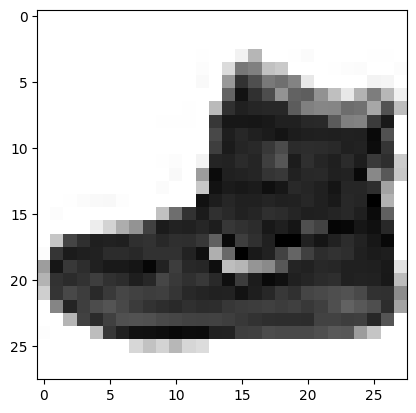

In [33]:
# Меняйте значение n чтобы просмотреть результаты распознавания других изображений
n = 0
plt.imshow(x_train[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

Данные на выходе из сети в формате one-hot-encoding

In [34]:
print(predictions[n])

[1.2113578e-08 2.6437677e-10 5.6224814e-10 4.8120630e-10 2.7906236e-10
 1.7514934e-04 7.2091382e-08 9.8393008e-04 7.3411184e-06 9.9883360e-01]


Определяем номер класса изображения, который предлагает сеть

In [35]:
np.argmax(predictions[n])

np.int64(9)

Печатаем название класса

In [36]:
classes[np.argmax(predictions[n])]

'ботинки'

Печатаем номер класса правильного ответа

In [37]:
np.argmax(y_train[n])

np.int64(9)

Печатаем название класса правильного ответа

In [38]:
classes[np.argmax(y_train[n])]

'ботинки'